<a href="https://colab.research.google.com/github/Vayansh/Machine_learning_training/blob/main/Percepton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def unit_step_fn(X):
  return np.where(X > 0,1,0)

In [102]:
class percepton:
  def __init__(self,learning_rate = 0.01,n_iter = 2000):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.activation = unit_step_fn
    self.weights = None
    self.bais = None

  def fit(self,X,y):
    n_samples, n_features = X.shape

    # randomly assign weights
    self.weights = np.array(np.random.randint(5,size = n_features),dtype = np.float32)
    self.bais = np.random.randint(2)

    y_ = np.where(y>0,1,0)

    # find weights and bais
    for _ in range(self.n_iter):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i,self.weights) + self.bais
        y_pred = self.activation(linear_output)

        # Percepton update rule
        l = self.learning_rate*(y_[idx]-y_pred)
        self.weights += l * x_i
        self.bais += l

  def predict(self,X):
    linear_output = np.dot(X,self.weights) + self.bais
    return self.activation(linear_output)




In [103]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [104]:
X,y = datasets.make_blobs(n_samples = 150,n_features = 2,centers = 2, cluster_std = 1.05,random_state = 2)

In [105]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [106]:
p = percepton()
p.fit(train_X,train_y)

In [107]:
y_pred = p.predict(test_X)

In [108]:
def accuracy_score(y_test,y_pred):
  return np.sum(y_test == y_pred) / y_test.shape[0]

In [109]:
accuracy_score(test_y,y_pred)

1.0

In [112]:
import matplotlib.pyplot as plt

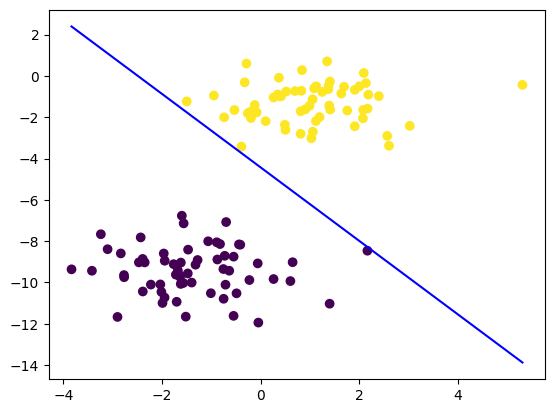

In [118]:
fig = plt.figure()
plt.scatter(train_X[:,0],train_X[:,1],c = train_y)
x0_1 = np.amin(train_X[:,0])
x0_2 = np.amax(train_X[:,0])
x1_1 = (-p.weights[0]*x0_1 - p.bais)/p.weights[1]
x1_2 = (-p.weights[0]*x0_2 - p.bais)/p.weights[1]
plt.plot([x0_1,x0_2],[x1_1,x1_2],'b')